# Import Libraries needed

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings("ignore")

#1. Read Data

In [2]:
train_data = pd.read_csv("titanic_data/train.csv")
test_data = pd.read_csv("titanic_data/test.csv")

titanicDF = pd.concat([train_data,test_data],axis=0)

display(train_data.head())
display(train_data.info())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

## Dataset Columns

- **PassengerId**: A unique identifier assigned to each passenger on the Titanic.
- **Survived**: Indicates whether a passenger survived the disaster. It has binary values: 0 for not survived and 1 for survived.
- **Pclass**: Represents the passenger class, categorized as 1, 2, or 3 (1st, 2nd, or 3rd class).
- **Name**: The name of the passenger.
- **Sex**: The gender of the passenger.
- **Age**: The age of the passenger in years.
- **SibSp**: Represents the number of siblings or spouses the passenger had aboard the Titanic.
- **Parch**: Represents the number of parents or children the passenger had aboard the Titanic.
- **Ticket**: The ticket number assigned to the passenger.
- **Fare**: The fare or price paid by the passenger for the ticket.
- **Cabin**: The cabin number assigned to the passenger (if available).
- **Embarked**: Indicates the port of embarkation for the passenger (C = Cherbourg, Q = Queenstown, S = Southampton).

We are gonna set a function to get rapidly some important characteristics:

In [3]:
def get_charac(df):
    sup=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        sum_mean = df[col].isnull().mean()
        sup.append([col,dtypes,nunique,sum_null,sum_mean])
    df_check=pd.DataFrame(sup)
    df_check.columns=['column','dtypes','nunique','sum_null','sum_mean']
    return df_check 

In [4]:
get_charac(titanicDF)

,column,dtypes,nunique,sum_null,sum_mean
0,PassengerId,int64,1309,0,0.000000
1,Survived,float64,2,418,0.319328
2,Pclass,int64,3,0,0.000000
3,Name,object,1307,0,0.000000
4,Sex,object,2,0,0.000000
5,Age,float64,98,263,0.200917
6,SibSp,int64,7,0,0.000000
7,Parch,int64,8,0,0.000000
8,Ticket,object,929,0,0.000000
9,Fare,float64,281,1,0.000764


Now we are going to get rid of outliers, following
[this repo](https://gist.github.com/joseph-allen/14d72af86689c99e1e225e5771ce1600)

In [5]:
def detect_outliers(df, n, features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []

    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col], 75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1

        # outlier step
        outlier_step = 1.5 * IQR

        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index

        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)

    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n)

    return multiple_outliers

In [6]:
from collections import Counter
outliers = detect_outliers(train_data,2,["Age","SibSp","Parch","Fare"])
train_data.iloc[outliers,:][["Age","SibSp","Parch","Fare"]] # This data we are taking out.
display(train_data.iloc[train_data.index[outliers],:])
print(train_data.shape)
train_data.drop(train_data.index[outliers],inplace=True)
print(train_data.shape)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


(891, 12)
(881, 12)


We take out outliers from train dataset, to later be able to make graphic about  "Survived" rate
with it. And we can't take data from test set. Test set can only be process, not dropped.

# Graphical exploration of data

Pie plot of survived

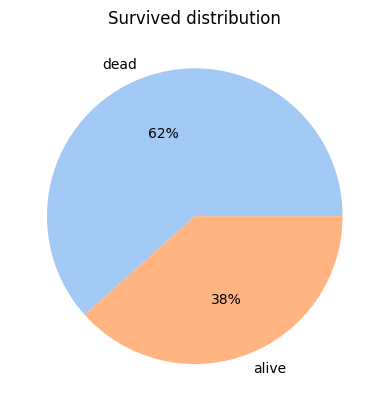

In [7]:
pieid = titanicDF["Survived"].value_counts()

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie( pieid.values, labels = ["dead","alive"], colors = colors, autopct='%.0f%%')

plt.title("Survived distribution")
plt.show()

Let's check age hist plot with survival rate in hue

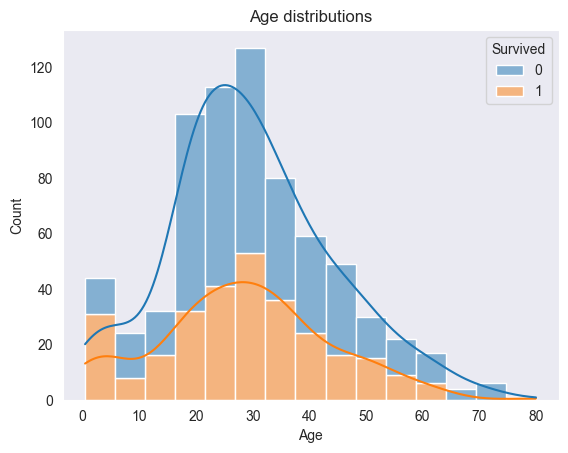

In [8]:
sns.set_style("dark")
sns.histplot(x = 'Age', hue = 'Survived', data = train_data,bins = 15, multiple='stack', kde = True, color = 'black')

plt.title("Age distributions")
plt.show()

Most deaths: between 20 and 40 more less.
We see it's normal distributed, both cases.

Text(0.5, 1.0, 'Home Planet vs Age')

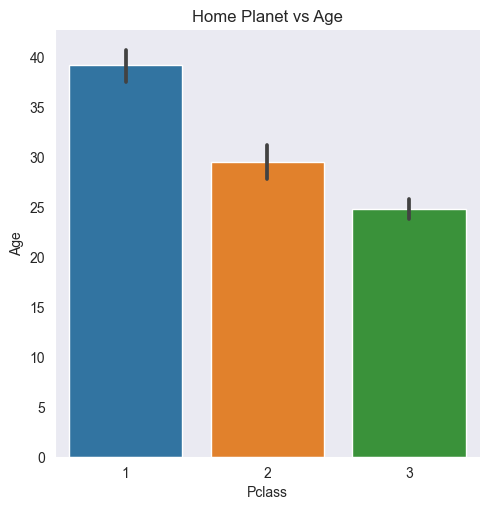

In [9]:
# Let's see how age is distirbuted among Classes:
sns.catplot(y="Age", x="Pclass", kind="bar", data=titanicDF)
plt.title('Home Planet vs Age')

We can see first class have way older people than lower clases.

Let's check the info related to the gender

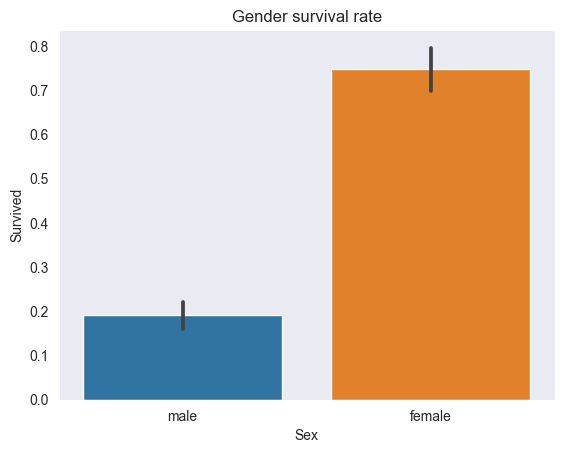

In [10]:
sns.barplot(x=train_data.Sex,y=train_data.Survived)
plt.title("Gender survival rate")
plt.show()

We can see Females survival rate is way bigger.


#### Now let's see the survival rate in relation to family issues:


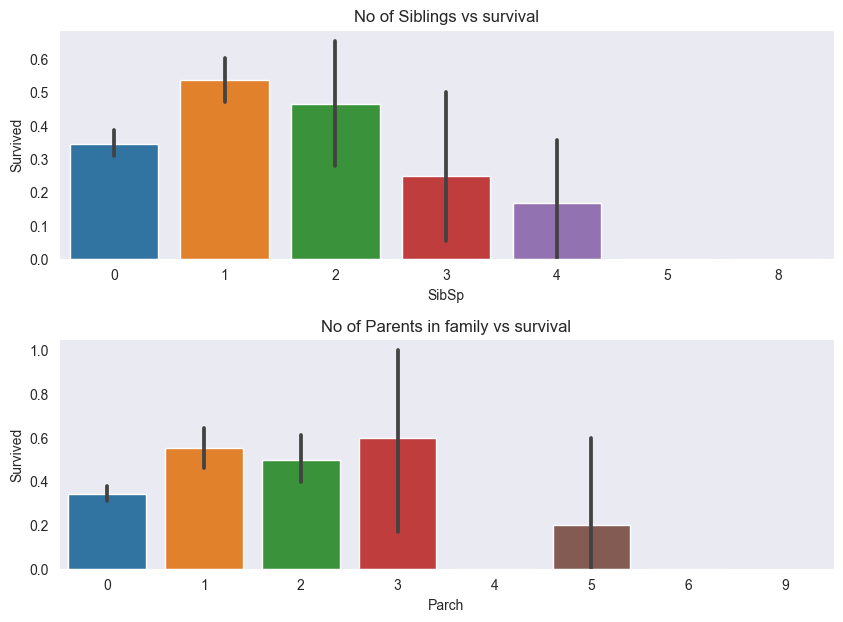

In [11]:

plt.figure(figsize=(10,7))
plt.subplot(2,1,1)
sns.barplot(x = 'SibSp', y = 'Survived', data = titanicDF)
plt.title("No of Siblings vs survival")
plt.subplot(2,1,2)
sns.barplot(x = 'Parch', y = 'Survived', data = titanicDF)
plt.title("No of Parents in family vs survival")

plt.subplots_adjust(wspace=0.35, hspace=0.35)
plt.show()



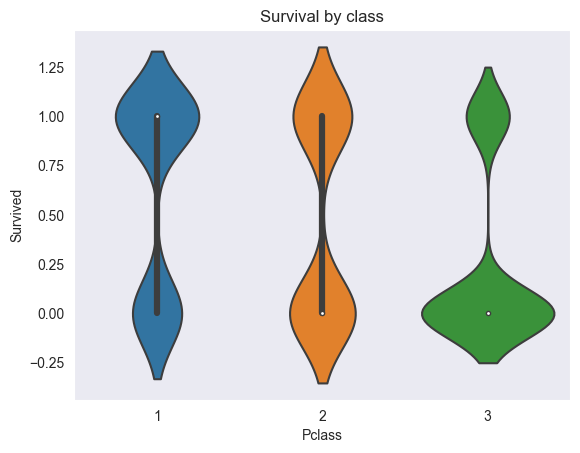

In [12]:
sns.violinplot(x = 'Pclass', y = 'Survived', data = train_data)
plt.title('Survival by class')
plt.show()

+ +rich  -> +survived
+ +poor -> +dead

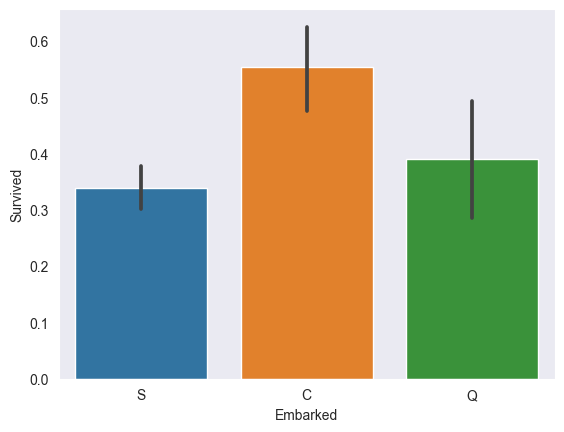

In [13]:
sns.barplot(x = 'Embarked', y = 'Survived', data = train_data)
plt.show()

Pople from C was more likely to survive. Better survival skills I guess.

Let's check relation between fare and survival, even though we already have the class relation.

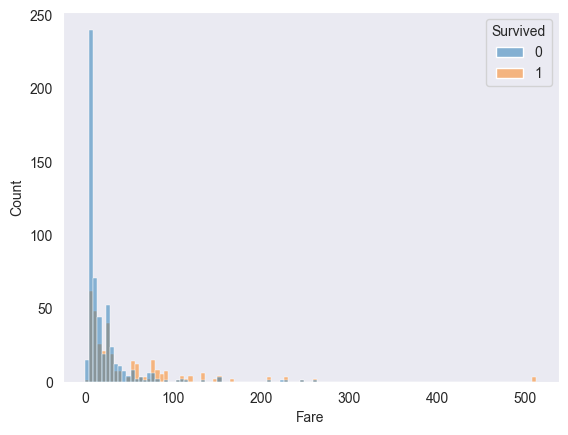

In [14]:
sns.histplot(x=train_data.Fare,hue=train_data.Survived)
plt.show()

We can't see very well, but richest survived most, when poorest just died in masses.

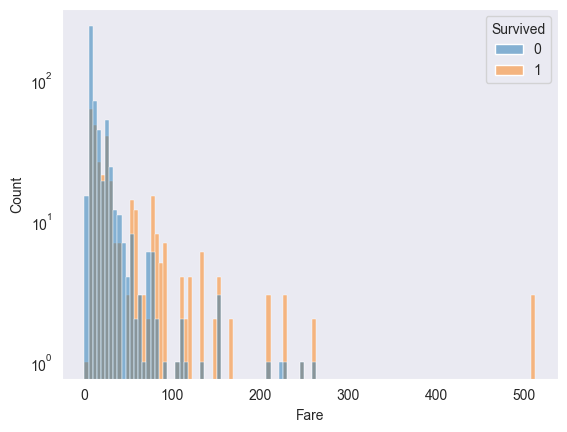

In [15]:
sns.histplot(x=train_data.Fare,hue=train_data.Survived)

plt.yscale('log')
plt.show()

# Proccesing Data + Feature Engineering

Now we are gonna process all the data, filling null values, encoding categorical values and setting everything in order to be able to train or models properly:

In [16]:
get_charac(titanicDF)[["column","dtypes","nunique","sum_null"]]

,column,dtypes,nunique,sum_null
0,PassengerId,int64,1309,0
1,Survived,float64,2,418
2,Pclass,int64,3,0
3,Name,object,1307,0
4,Sex,object,2,0
5,Age,float64,98,263
6,SibSp,int64,7,0
7,Parch,int64,8,0
8,Ticket,object,929,0
9,Fare,float64,281,1


+ dtypes: Are ok for everything. Later we will encode categorical values after some cleaning.
+ Null values: For survived it's ok, since they are from the test set, but we can do stuff for other categories.
+ nunique: we can try to look for a pattern in Name, Ticket, and Cabin in order for them to be less variant.

#### Name: Looking for a pattern

In [17]:
# Let's clean it and try to keep the titles of the people.
titanicDF["Name"] # We can see a pattern: NAME, TITLE. .... Everything else. Let's strip(" ") and split(",") to try and keep the title
titanicDF["Title"] = titanicDF.Name.map(lambda x: x.replace(" ","").replace(".",",").split(",")[1])
titles_counted = titanicDF.Title.value_counts().reset_index() # We seem to have Mr, Miss, Mrs, Master, Rev.... And then some other differents, but just so few units of them.
# We are going to set those few wird title as ""
weird_titles = list(titles_counted.iloc[4:,0])

titanicDF.Title.replace(weird_titles,"Weird",inplace=True)

titanicDF.drop("Name",axis=1,inplace=True)

titanicDF.Title.value_counts()

Mr        757
Miss      260
Mrs       197
Master     61
Weird      34
Name: Title, dtype: int64

#### Age: Filling null values

In [18]:
# We have seen relation of age depending on the class. let's fill the age gaps with the mean of each class.
meanAge_class = titanicDF.groupby("Pclass").Age.mean().round().reset_index()

def fillAge(row):
    if pd.isnull(row.Age):
        return meanAge_class.iloc[row.Pclass-1,1]
    else:
        return row.Age

titanicDF["Age"] = titanicDF.apply(fillAge,axis=1)
# meanAge_class.iloc[2,1]
titanicDF.Age.isnull().sum()

0

#### Ticket: Trying to look for something usefull

In [19]:
titanicDF.Ticket.sample(7)

287           349206
567           349909
452           113051
425       A/4. 34244
589       A./5. 3235
192           350046
155    S.O./P.P. 752
Name: Ticket, dtype: object

Taking a look at Tickets, we sadly have little to do, since there is no string to pull form, no pattern... We are going to: drop it :c

In [20]:
titanicDF.drop("Ticket",axis=1,inplace=True)
titanicDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Fare         1308 non-null   float64
 8   Cabin        295 non-null    object 
 9   Embarked     1307 non-null   object 
 10  Title        1309 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 155.0+ KB


#### Cabin: Look for a pattern and fill nulls

In [21]:
#Let's take a look on Cabin. We have both: Too many null values, and too much variance on data. Let's try to make something out of it.
get_charac(titanicDF).iloc[10,:] # 186 different values and 1014 null values. Uf.

titanicDF.Cabin.sample(50) # We can see that the values one, have a letter at the beginning meaning the Deck they were put at. We are gonna fill the rest with letter "W" for the Workers, I assume they had no "Cabin" whatsoever.

titanicDF["Deck"] = titanicDF.Cabin.map(lambda x: x[0] if pd.notnull(x) else "W")
titanicDF.drop("Cabin",axis=1,inplace=True)

<Axes: xlabel='Deck', ylabel='Count'>

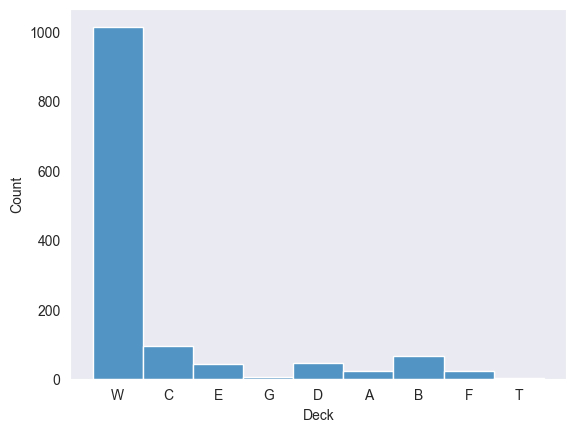

In [22]:
sns.histplot(x=titanicDF.Deck)

#### Embarked: Fill with the mode, the null values.

In [23]:
# Replacing null embarkment with the most frequent one.
titanicDF.loc[titanicDF.Embarked.isnull()] # We see there are only 2 null Embarkments, which can mean they were not registered. We can fill it randomlly with other values or leave it as it is.
titanicDF['Embarked'].fillna(titanicDF['Embarked'].mode()[0], inplace=True)

#### Fare: Fill null and Try to normalize it in order for it to not be so dirty

In [24]:
titanicDF.Fare.sample(40)
titanicDF.Fare.isnull().sum()  # We have 1 null. Will fill it with the Fare mean of its Pclass.
mean_Fares = titanicDF.groupby("Pclass").Fare.mean().round().reset_index()
nulled_class = list(titanicDF.loc[pd.isnull(titanicDF.Fare),"Pclass"])

titanicDF["Fare"] = titanicDF.Fare.fillna(mean_Fares.iloc[nulled_class[0]-1,1])

In [25]:
get_charac(titanicDF)

,column,dtypes,nunique,sum_null,sum_mean
0,PassengerId,int64,1309,0,0.000000
1,Survived,float64,2,418,0.319328
2,Pclass,int64,3,0,0.000000
3,Sex,object,2,0,0.000000
4,Age,float64,98,0,0.000000
5,SibSp,int64,7,0,0.000000
6,Parch,int64,8,0,0.000000
7,Fare,float64,281,0,0.000000
8,Embarked,object,3,0,0.000000
9,Title,object,5,0,0.000000


In [26]:
#We have to normalize Fare. Some way.
